In [2]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

In [3]:
#파일 불러오기
df=pd.read_csv('//home/piai/바탕화면/df.csv',encoding='cp949')

In [4]:
df.head()

,Unnamed: 0,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,...,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,계절,습도상태,강수상태,방문수,방문등급
0,0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,...,-6.5,0.3,9.83,0.1,64.4,겨울,3,0,NaN,NaN
1,1,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,...,-6.5,0.3,9.83,0.1,64.4,겨울,3,0,NaN,NaN
2,2,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,...,-6.5,0.3,9.83,0.1,64.4,겨울,3,0,NaN,NaN
3,3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,...,-3.2,6.6,0.00,0.0,45.6,겨울,2,0,NaN,NaN
4,4,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,...,-3.2,6.6,0.00,0.0,45.6,겨울,2,0,NaN,NaN


In [4]:
df.shape

(510223, 28)

In [151]:
df[df['ItemNameMiddle']=='안주류']['강수상태'].box

15        0
29        0
45        2
93        0
104       0
         ..
510175    0
510180    0
510189    0
510193    0
510200    1
Name: 강수상태, Length: 36967, dtype: int64

# 시간대별 매출

In [5]:
HourSum=df.groupby(['SalesHour'], as_index=False).agg('Price').sum()
HourSum

,SalesHour,Price
0,0,67769990
1,1,40048520
2,2,12069860
3,3,12274040
4,4,12746490
5,5,22240260
6,6,24941800
7,7,56963820
8,8,93756960
9,9,94954300


<AxesSubplot:xlabel='SalesHour'>

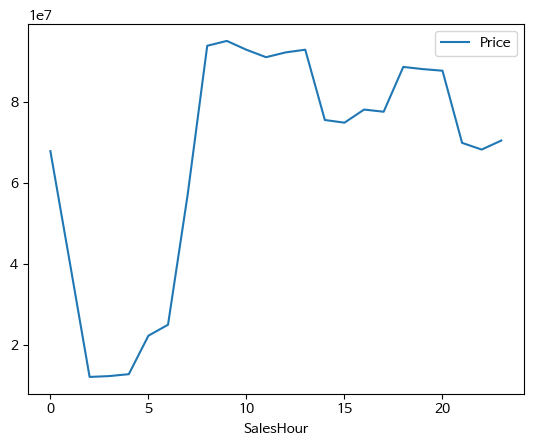

In [6]:
HourSum.plot(x='SalesHour',y='Price')

In [7]:
pivot =pd.pivot_table(data=df, index=['SalesHour','ItemNameLarge'], values='Price', aggfunc='count').reset_index()
pivot

,SalesHour,ItemNameLarge,Price
0,0,간편식사,1363
1,0,과자류,6578
2,0,식품,7714
3,0,아이스크림,1576
4,0,음료,4332
...,...,...,...
139,23,과자류,6141
140,23,식품,8700
141,23,아이스크림,1461
142,23,음료,4182


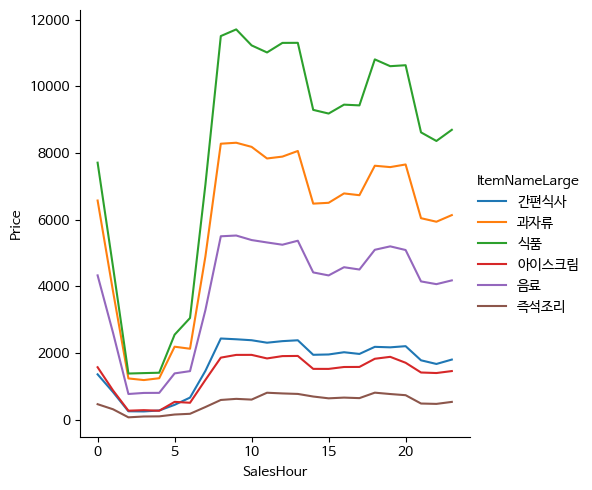

In [8]:
#갯수
sns.relplot(x='SalesHour',y='Price',hue='ItemNameLarge',data=pivot, kind='line',ci=None)
plt.show()

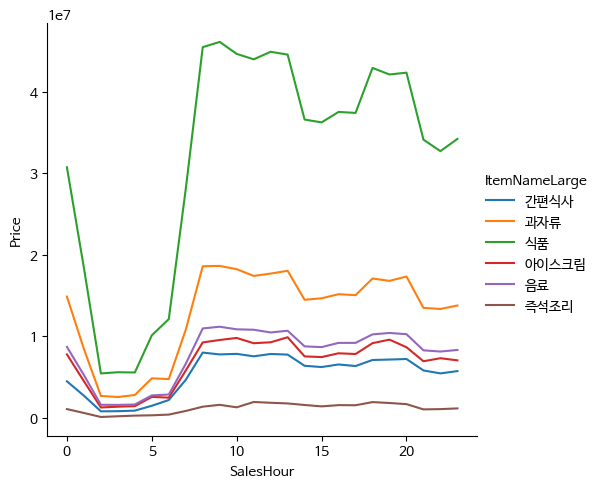

In [9]:
pivot =pd.pivot_table(data=df, index=['SalesHour','ItemNameLarge'], values='Price', aggfunc='sum').reset_index()
pivot
#총매출
sns.relplot(x='SalesHour',y='Price',hue='ItemNameLarge',data=pivot, kind='line',ci=None)
plt.show()

In [50]:
pivot =pd.pivot_table(data=df, index=['SalesYear'],columns=['ItemNameMiddle'], values='Price', aggfunc='count').style.background_gradient(axis=1)
pivot

ItemNameMiddle,가공식사,껌/초콜릿/캔디,도시락,베이커리,빵/디저트,샌드위치/햄버거,스낵/비스켓,식재료,아이스링크,아이스크림,안주류,유제품,음료,주먹밥/김밥,즉석커피,튀김류
SalesYear,,,,,,,,,,,,,,,,
2020,43296,19936,6092,2444,23888,7520,22692,31158,3767,14831,17817,8093,32768,5472,441,3012
2021,46724,21927,6550,2690,26091,8051,24904,34240,4266,18052,19150,8778,35803,5907,498,3365


In [51]:
pivot =pd.pivot_table(data=df, index=['SalesYear'],columns=['ItemNameMiddle'], values='Price', aggfunc='sum').style.background_gradient(axis=1)
pivot

ItemNameMiddle,가공식사,껌/초콜릿/캔디,도시락,베이커리,빵/디저트,샌드위치/햄버거,스낵/비스켓,식재료,아이스링크,아이스크림,안주류,유제품,음료,주먹밥/김밥,즉석커피,튀김류
SalesYear,,,,,,,,,,,,,,,,
2020,162637670,39767550,29149200,3556700,60890050,22842900,48531600,127354720,5201300,73814900,73312800,14694730,69620050,10272400,2124900,7817900
2021,176568750,43432250,31513400,3814800,66189450,24462200,53233100,143440040,5989500,90314800,78713900,15911910,76592500,11115800,2793500,8947300


In [54]:
pivot =pd.pivot_table(data=df, index=['ItemNameMiddle'],columns=['SalesYear'], values='Price', aggfunc='mean').style.background_gradient(axis=0)
pivot

SalesYear,2020,2021
ItemNameMiddle,,
가공식사,3756.413295,3778.973333
껌/초콜릿/캔디,1994.760734,1980.765723
도시락,4784.832567,4811.206107
베이커리,1455.278232,1418.141264
빵/디저트,2548.980660,2536.869035
샌드위치/햄버거,3037.619681,3038.405167
스낵/비스켓,2138.709677,2137.532123
식재료,4087.384299,4189.253505
아이스링크,1380.753916,1404.008439


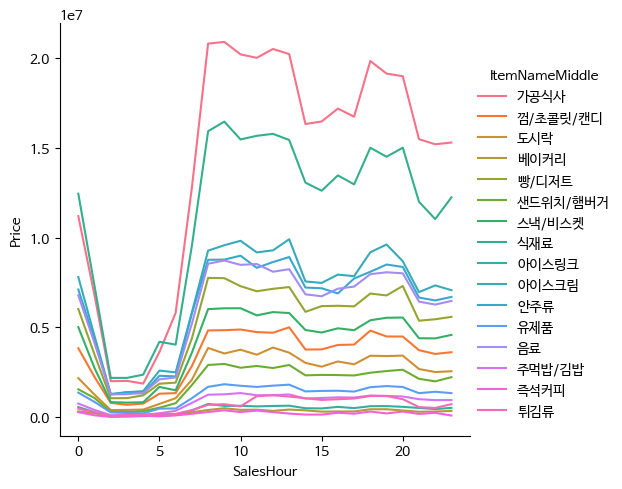

In [10]:
pivot =pd.pivot_table(data=df, index=['SalesHour','ItemNameMiddle'], values='Price', aggfunc='sum').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='ItemNameMiddle',data=pivot, kind='line',ci=None)
plt.show()

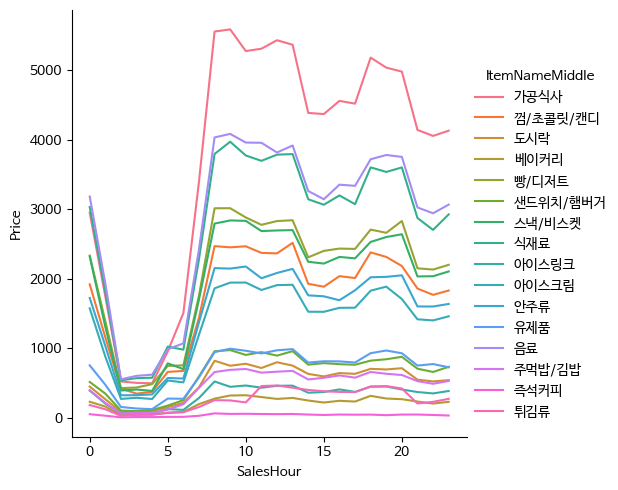

In [11]:
pivot =pd.pivot_table(data=df, index=['SalesHour','ItemNameMiddle'], values='Price', aggfunc='count').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='ItemNameMiddle',data=pivot, kind='line',ci=None)
plt.show()

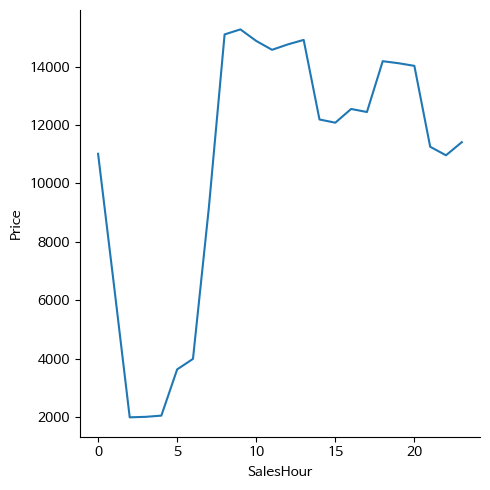

In [12]:
pivot =pd.pivot_table(data=df, index=['SalesHour',df['ItemNameMiddle']=='도시락'], values='Price', aggfunc='count').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',data=pivot, kind='line',ci=None)
plt.show()

In [39]:
df1=df[(df['ItemNameMiddle']=='도시락')] 
df2=df[(df['ItemNameMiddle']=='가공식사')]
df3=pd.concat([df1,df2], axis=0)

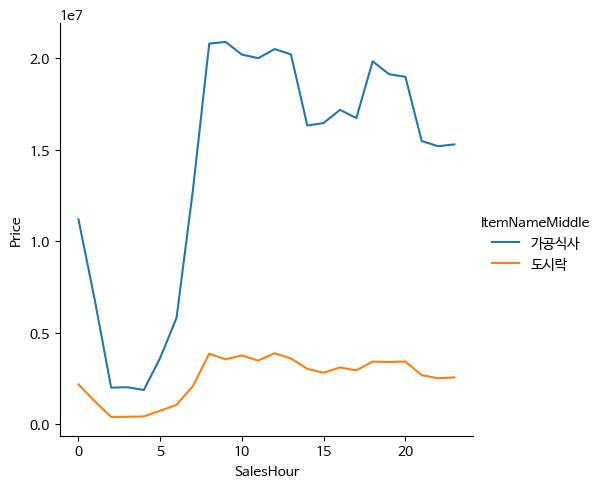

In [41]:
pivot =pd.pivot_table(data=df3, index=['SalesHour',df['ItemNameMiddle']], values='Price', aggfunc='sum').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price', hue='ItemNameMiddle',data=pivot, kind='line',ci=None)
plt.show()

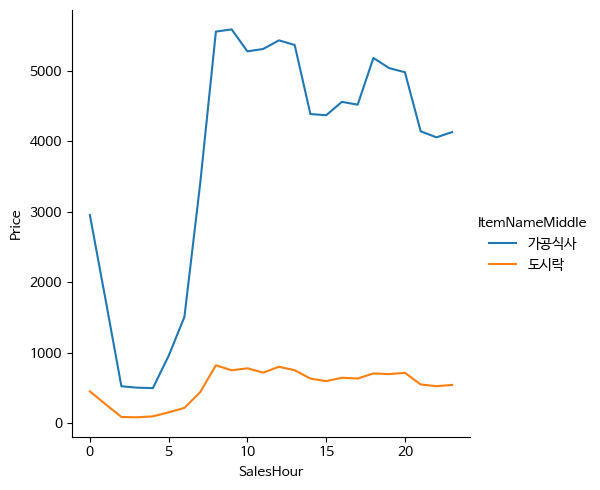

In [42]:
pivot =pd.pivot_table(data=df3, index=['SalesHour',df['ItemNameMiddle']], values='Price', aggfunc='count').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price', hue='ItemNameMiddle',data=pivot, kind='line',ci=None)
plt.show()

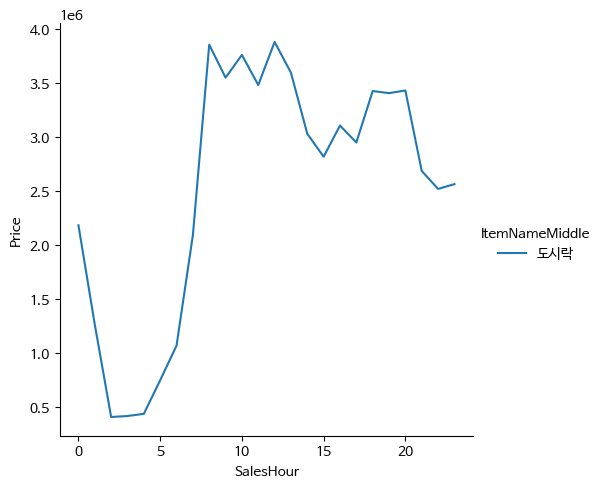

In [16]:
sns.relplot(x='SalesHour',y='Price',hue='ItemNameMiddle',data=pivot, kind='line',ci=None)
plt.show()

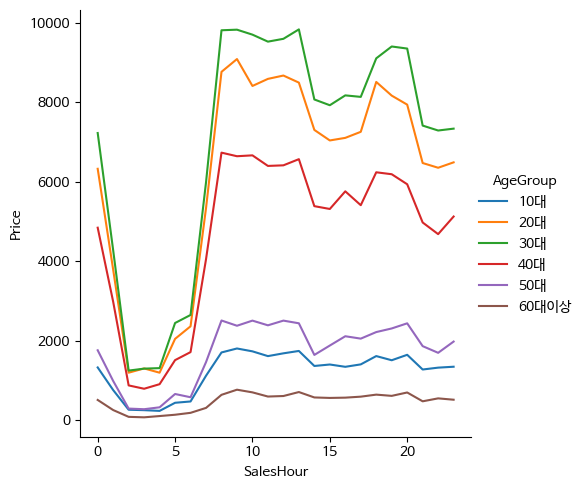

In [17]:
pivot =pd.pivot_table(data=df, index=['SalesHour','AgeGroup'], values='Price', aggfunc='count').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='AgeGroup',data=pivot, kind='line',ci=None)
plt.show()

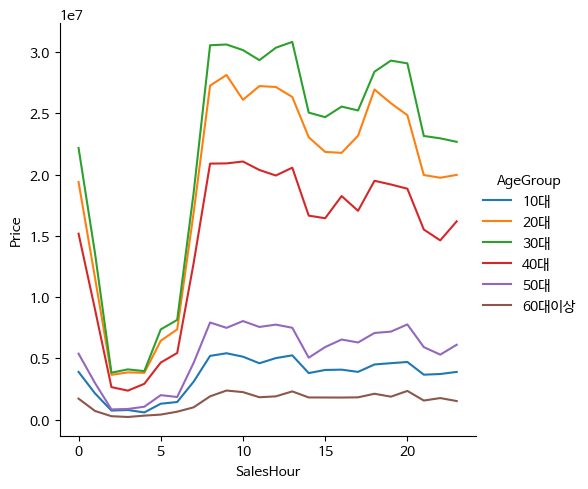

In [18]:
pivot =pd.pivot_table(data=df, index=['SalesHour','AgeGroup'], values='Price', aggfunc='sum').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='AgeGroup',data=pivot, kind='line',ci=None)
plt.show()

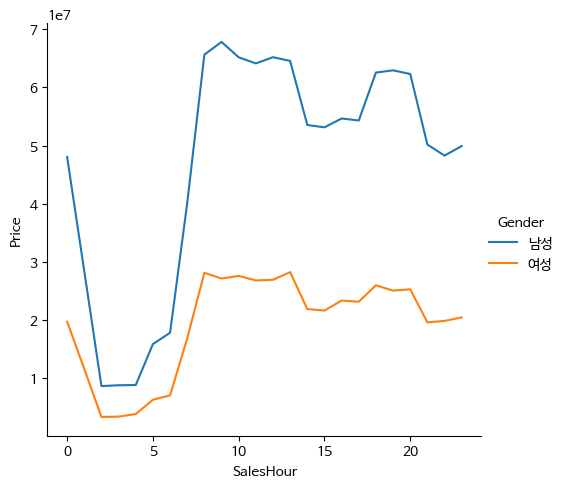

In [19]:
pivot =pd.pivot_table(data=df, index=['SalesHour','Gender'], values='Price', aggfunc='sum').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='Gender',data=pivot, kind='line',ci=None)
plt.show()

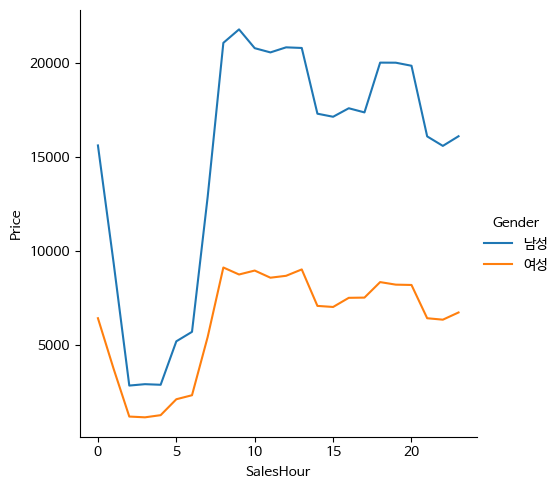

In [20]:
pivot =pd.pivot_table(data=df, index=['SalesHour','Gender'], values='Price', aggfunc='count').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='Gender',data=pivot, kind='line',ci=None)
plt.show()

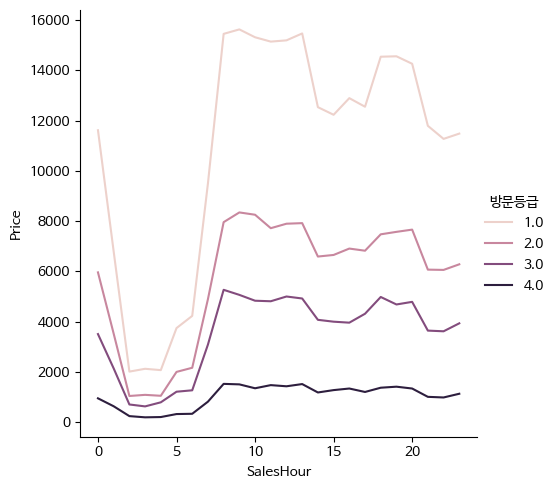

In [21]:
pivot =pd.pivot_table(data=df, index=['SalesHour','방문등급'], values='Price', aggfunc='count').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='방문등급',data=pivot, kind='line',ci=None)
plt.show()

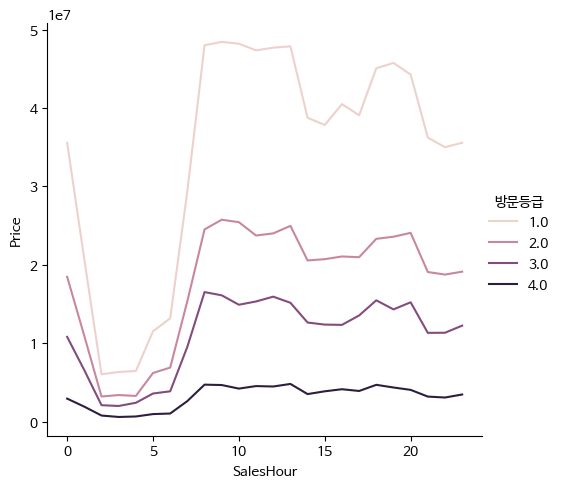

In [22]:
pivot =pd.pivot_table(data=df, index=['SalesHour','방문등급'], values='Price', aggfunc='sum').reset_index()
pivot

sns.relplot(x='SalesHour',y='Price',hue='방문등급',data=pivot, kind='line',ci=None)
plt.show()

In [23]:
pivot =pd.pivot_table(data=df, index=['SalesHour','AgeGroup','방문등급'], values='Price', aggfunc='count').reset_index()
pivot


,SalesHour,AgeGroup,방문등급,Price
0,0,10대,1.0,643
1,0,10대,2.0,463
2,0,10대,3.0,190
3,0,10대,4.0,38
4,0,20대,1.0,3347
...,...,...,...,...
571,23,50대,4.0,166
572,23,60대이상,1.0,199
573,23,60대이상,2.0,97
574,23,60대이상,3.0,153


In [11]:
pivot =pd.pivot_table(data=df, index=['SalesYear', 'ItemNameMiddle'], columns=['SalesHour'],
                      values='Price', aggfunc='sum')
pivot
pivot.to_excel('//home/piai/바탕화면/시간대별 중분류 매출.xlsx',encoding='cp949')

# 기상별

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/piai/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


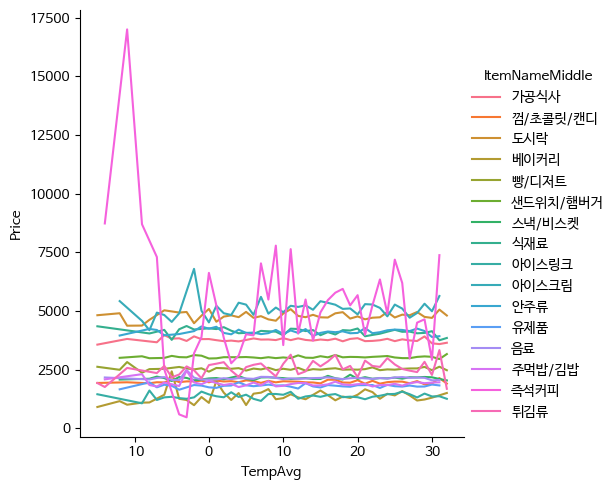

In [59]:
pivot =pd.pivot_table(data=df, index=['TempAvg','ItemNameMiddle'], values='Price', aggfunc='mean').reset_index()
pivot

sns.relplot(x=df['TempAvg'].round(0),y='Price',hue='ItemNameMiddle',data=pivot, kind='line',ci=None)
plt.show()

In [148]:
pivot =pd.pivot_table(data=df, index=[df['hourRainfall'].round(0)],columns=['ItemNameMiddle'], values='Price', aggfunc='mean').reset_index().style.background_gradient(axis=0)
pivot

ItemNameMiddle,hourRainfall,가공식사,껌/초콜릿/캔디,도시락,베이커리,빵/디저트,샌드위치/햄버거,스낵/비스켓,식재료,아이스링크,아이스크림,안주류,유제품,음료,주먹밥/김밥,즉석커피,튀김류
0,0.000000,206165360,50293250,36906600,4429200,76923920,28958600,62109900,164045650,6737400,97786900,89027800,18377580,87746900,13077000,2958600,10231500
1,1.000000,23038530,5886150,4151000,597400,8556040,3063200,7182200,18281060,800800,11022900,10961800,2094640,10089200,1467300,227300,1277700
2,2.000000,18285320,4526550,3259400,438800,7424110,2625400,5580900,14692000,641700,9660600,8631900,1769140,8143650,1190200,267100,922400
3,3.000000,9603840,2466350,1704900,162700,3558950,1487300,2843200,7717660,328700,4545200,4183900,871330,4286500,614200,178100,424200
4,4.000000,11959270,2857800,2044000,291000,4325950,1675200,3485000,9447080,371100,6279000,4888500,1003970,5280900,680800,181500,578600
5,5.000000,10926150,2544350,1853400,207900,4027160,1367600,3089000,8470130,328800,5217700,4669300,1041480,4561600,722700,129300,478700
6,6.000000,7277980,1908700,1390800,152900,2637670,1062700,2124700,6011600,212100,3782500,3478100,702220,3237500,448200,76400,354300
7,7.000000,5015810,1227200,929700,101100,1978300,686700,1624400,4241520,175100,2572600,2336500,490720,2193450,276200,123600,249200
8,8.000000,5347090,1211250,1070700,116500,1949790,727300,1530700,4560130,136500,2741900,2699400,497120,2231850,359000,73100,312300
9,9.000000,3896350,913600,703500,84200,1410590,501100,1103400,3167420,145600,1949600,1849100,294980,1678500,206800,70800,167600


In [ ]:
df['TempAvg'].round(0)

# 호빵

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510223 entries, 0 to 510222
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      510223 non-null  int64  
 1   idUser          510223 non-null  object 
 2   idPOS           510223 non-null  object 
 3   SalesDT         510223 non-null  object 
 4   SalesDate       510223 non-null  object 
 5   SalesYear       510223 non-null  int64  
 6   SalesYearMonth  510223 non-null  object 
 7   SalesMonth      510223 non-null  int64  
 8   SalesDow        510223 non-null  object 
 9   SalesHour       510223 non-null  int64  
 10  ItemId          510223 non-null  object 
 11  ItemName        510223 non-null  object 
 12  Gender          510223 non-null  object 
 13  AgeGroup        510223 non-null  object 
 14  ItemNameLarge   510223 non-null  object 
 15  ItemNameMiddle  510223 non-null  object 
 16  Price           510223 non-null  int64  
 17  TempAvg   

In [89]:
df['ItemName'].str.contains('호빵')

0         False
1         False
2         False
3         False
4         False
          ...  
510218    False
510219    False
510220    False
510221    False
510222    False
Name: ItemName, Length: 510223, dtype: bool

In [129]:
#파일 불러오기
weather=pd.read_csv('//home/piai/바탕화면/cvs_weather.csv',encoding='cp949')


w=weather['TempAvg'].round(0).value_counts().reset_index()
w.to_excel('//home/piai/바탕화면/weather.xlsx',encoding='cp949')

In [152]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemName'].str.contains('호빵')==True]['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/호방매출.xlsx',encoding='cp949')

In [126]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemNameMiddle']=='아이스크림']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/pivot.xlsx',encoding='cp949')

In [131]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/안주류.xlsx',encoding='cp949')

In [132]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemNameMiddle']=='아이스링크']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/아이스링크.xlsx',encoding='cp949')

In [133]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemNameMiddle']=='튀김류']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/튀김류.xlsx',encoding='cp949')

# 강수상태 등급과 엑셀

In [137]:
df.drop_duplicates(subset='SalesDate')

,Unnamed: 0,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,...,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,계절,습도상태,강수상태,방문수,방문등급
0,0,U100001,U100001-POS2020-10001,2020-01-01T10:47:03,2020-01-01,2020,2020-01,1,수요일,10,...,-6.5,0.3,9.83,0.1,64.4,겨울,3,0,NaN,NaN
3,3,U100001,U100001-POS2020-10004,2020-01-05T19:08:12,2020-01-05,2020,2020-01,1,일요일,19,...,-3.2,6.6,0.00,0.0,45.6,겨울,2,0,NaN,NaN
5,5,U100001,U100001-POS2020-10006,2020-01-09T00:42:18,2020-01-09,2020,2020-01,1,목요일,0,...,-3.1,2.0,0.00,0.0,65.3,겨울,3,0,NaN,NaN
6,6,U100001,U100001-POS2020-10008,2020-01-12T06:16:24,2020-01-12,2020,2020-01,1,일요일,6,...,-3.5,2.8,0.00,0.0,61.5,겨울,3,0,NaN,NaN
7,7,U100831,U100831-POS2021-10308,2021-09-15T20:34:30,2021-09-15,2021,2021-09,9,수요일,20,...,19.5,28.9,0.00,0.0,57.5,가을,2,0,179.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12489,12489,U100850,U100850-POS2020-10072,2020-01-29T18:32:24,2020-01-29,2020,2020-01,1,수요일,18,...,3.2,9.6,0.00,0.0,46.4,겨울,2,0,239.0,1.0
12537,12537,U100850,U100850-POS2020-10164,2020-03-07T00:00:28,2020-03-07,2020,2020-03,3,토요일,0,...,1.3,14.2,0.00,0.0,39.5,봄,2,0,239.0,1.0
14193,14193,U100851,U100851-POS2020-10089,2020-04-26T11:06:03,2020-04-26,2020,2020-04,4,일요일,11,...,6.8,19.0,0.00,0.0,43.1,봄,2,0,147.0,2.0
14460,14460,U100851,U100851-POS2020-10298,2021-01-17T11:06:06,2021-01-17,2021,2021-01,1,일요일,11,...,-10.8,-1.3,5.25,0.0,58.5,겨울,2,0,147.0,2.0


In [144]:
rain=df['강수상태'].round(0).value_counts().reset_index()
rain.to_excel('//home/piai/바탕화면/강수상태.xlsx',encoding='cp949')

In [140]:
pivot =pd.pivot_table(data=df, index=['강수상태',df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수상태 안주류.xlsx',encoding='cp949')

In [145]:
pivot =pd.pivot_table(data=df, index=['강수상태',df[df['ItemNameMiddle']=='가공식사']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수상태 가공식사.xlsx',encoding='cp949')

In [146]:
pivot =pd.pivot_table(data=df, index=['강수상태',df[df['ItemNameMiddle']=='도시락']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수상태 도시락.xlsx',encoding='cp949')

In [150]:
pivot =pd.pivot_table(data=df, index=['강수상태',df[df['ItemNameMiddle']=='식재료']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수상태 식재료.xlsx',encoding='cp949')

In [141]:
humi=df['습도상태'].round(0).value_counts().reset_index()
humi.to_excel('//home/piai/바탕화면/습도상태.xlsx',encoding='cp949')

In [143]:
pivot =pd.pivot_table(data=df, index=['습도상태',df[df['ItemNameMiddle']=='음료']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/습도상태 안주류.xlsx',encoding='cp949')

In [ ]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemName'].str.contains('호빵')==True]['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/온도호방매출.xlsx',encoding='cp949')

In [158]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemNameMiddle']=='아이스링크']['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/기온별 아이스링크 매출.xlsx',encoding='cp949')

In [157]:
pivot =pd.pivot_table(data=df, index=[df['TempAvg'].round(0),df[df['ItemNameMiddle']=='아이스크림']['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/기온별 아이스크림 매출.xlsx',encoding='cp949')

# 강수등급xxxxx 강수별 안주

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510223 entries, 0 to 510222
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      510223 non-null  int64  
 1   idUser          510223 non-null  object 
 2   idPOS           510223 non-null  object 
 3   SalesDT         510223 non-null  object 
 4   SalesDate       510223 non-null  object 
 5   SalesYear       510223 non-null  int64  
 6   SalesYearMonth  510223 non-null  object 
 7   SalesMonth      510223 non-null  int64  
 8   SalesDow        510223 non-null  object 
 9   SalesHour       510223 non-null  int64  
 10  ItemId          510223 non-null  object 
 11  ItemName        510223 non-null  object 
 12  Gender          510223 non-null  object 
 13  AgeGroup        510223 non-null  object 
 14  ItemNameLarge   510223 non-null  object 
 15  ItemNameMiddle  510223 non-null  object 
 16  Price           510223 non-null  int64  
 17  TempAvg   

In [169]:
weather

,AreaId,Area,dateObs,TempAvg,TempMin,hhmiTempMin,TempMax,hhmiTempMax,hourRainfall,RainfallAmount,HumidAvg,SnowloadMax,hhmiSnowloadMax
0,108,서울,2020-01-01,-2.2,-6.5,1,0.3,1457,9.83,0.1,64.4,0.0,NaN
1,108,서울,2020-01-02,1.0,-0.7,1,3.8,1500,NaN,NaN,65.4,NaN,NaN
2,108,서울,2020-01-03,-0.1,-3.4,807,4.6,1547,NaN,NaN,56.9,NaN,NaN
3,108,서울,2020-01-04,1.2,-2.8,512,6.1,1450,NaN,NaN,50.8,NaN,NaN
4,108,서울,2020-01-05,1.3,-3.2,821,6.6,1453,NaN,NaN,45.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,108,서울,2021-12-27,-7.6,-12.9,123,-3.9,1634,2.08,0.0,60.9,NaN,NaN
727,108,서울,2021-12-28,-4.1,-8.5,712,-0.9,1600,NaN,NaN,73.8,NaN,NaN
728,108,서울,2021-12-29,0.4,-3.8,154,5.9,1518,1.58,0.2,72.9,0.3,455.0
729,108,서울,2021-12-30,-3.9,-6.8,714,0.2,1531,0.50,0.0,48.5,NaN,NaN


In [173]:
RainfallAmount=weather['RainfallAmount'].round(-1).value_counts().reset_index()
RainfallAmount

,index,RainfallAmount
0,0.0,214
1,10.0,48
2,20.0,12
3,30.0,10
4,40.0,7
5,60.0,5
6,70.0,5
7,50.0,4
8,100.0,3
9,80.0,2


In [174]:
RainfallAmount.to_excel('//home/piai/바탕화면/강수량별.xlsx',encoding='cp949')

In [175]:
pivot =pd.pivot_table(data=df, index=[df['RainfallAmount'].round(-1),df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수량별 안주류 매출.xlsx',encoding='cp949')

In [176]:
pivot =pd.pivot_table(data=df, index=[df['RainfallAmount'].round(-1),df[df['ItemNameMiddle']=='가공식사']['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수량별 가공식사 매출.xlsx',encoding='cp949')

In [178]:
pivot =pd.pivot_table(data=df, index=[df['RainfallAmount'].round(-1),df[df['ItemNameMiddle']=='도시락']['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수량별 도시락 매출.xlsx',encoding='cp949')

In [179]:
pivot =pd.pivot_table(data=df, index=[df['RainfallAmount'].round(-1),df[df['ItemNameMiddle']=='안주류']['ItemNameMiddle']],
                      values='Price', aggfunc='count').reset_index()
pivot
pivot.to_excel('//home/piai/바탕화면/강수량별 안주류 판매수.xlsx',encoding='cp949')

# 20,21년 13시 매출

In [ ]:
pivot =pd.pivot_table(data=df, index=[df['RainfallAmount'].round(-1),df[(df['ItemNameMiddle']=='도시락']['ItemNameMiddle']],
                      values='Price', aggfunc='sum').reset_index()

In [192]:
#파일 불러오기
df=pd.read_csv('//home/piai/바탕화면/df.csv',encoding='cp949')

In [197]:
df[df['SalesHour']==13]

,Unnamed: 0,idUser,idPOS,SalesDT,SalesDate,SalesYear,SalesYearMonth,SalesMonth,SalesDow,SalesHour,...,TempMin,TempMax,hourRainfall,RainfallAmount,HumidAvg,계절,습도상태,강수상태,방문수,방문등급
136,136,U100831,U100831-POS2021-10406,2021-11-27T13:57:30,2021-11-27,2021,2021-11,11,토요일,13,...,-1.4,10.1,0.00,0.0,53.0,가을,2,0,179.0,1.0
148,148,U100831,U100831-POS2021-10425,2021-12-13T13:54:00,2021-12-13,2021,2021-12,12,월요일,13,...,-5.9,1.9,0.00,0.0,43.8,겨울,2,0,179.0,1.0
149,149,U100831,U100831-POS2021-10425,2021-12-13T13:54:00,2021-12-13,2021,2021-12,12,월요일,13,...,-5.9,1.9,0.00,0.0,43.8,겨울,2,0,179.0,1.0
150,150,U100831,U100831-POS2021-10425,2021-12-13T13:54:00,2021-12-13,2021,2021-12,12,월요일,13,...,-5.9,1.9,0.00,0.0,43.8,겨울,2,0,179.0,1.0
570,570,U100831,U100831-POS2020-10393,2020-11-25T13:01:18,2020-11-25,2020,2020-11,11,수요일,13,...,0.0,9.5,0.00,0.0,64.1,가을,3,0,179.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510014,510014,U100830,U100830-POS2021-10440,2021-09-28T13:19:08,2021-09-28,2021,2021-09,9,화요일,13,...,19.6,24.4,9.28,1.3,75.1,가을,4,1,212.0,1.0
510015,510015,U100830,U100830-POS2021-10440,2021-09-28T13:19:08,2021-09-28,2021,2021-09,9,화요일,13,...,19.6,24.4,9.28,1.3,75.1,가을,4,1,212.0,1.0
510057,510057,U100830,U100830-POS2021-10466,2021-10-10T13:04:02,2021-10-10,2021,2021-10,10,일요일,13,...,14.9,24.3,13.33,14.2,89.0,가을,4,2,212.0,1.0
510058,510058,U100830,U100830-POS2021-10466,2021-10-10T13:04:02,2021-10-10,2021,2021-10,10,일요일,13,...,14.9,24.3,13.33,14.2,89.0,가을,4,2,212.0,1.0


In [199]:
pivot = pd.pivot_table(data=df, index=['SalesYear',df[df['SalesHour']==13]['SalesHour']], columns=['ItemNameMiddle'], values=['Price'],
                      aggfunc='sum')
pivot
pivot.to_excel('//home/piai/바탕화면/년도별 13시 매출액 비교.xlsx',encoding='cp949')

In [216]:
pivot = pd.pivot_table(data=df, index=['SalesYear',df[df['SalesHour']==13]['SalesHour']], columns=['ItemNameMiddle'], values=['Price'],
                      aggfunc='count')
pivot
pivot.to_excel('//home/piai/바탕화면/년도별 13시 판매수 비교.xlsx',encoding='cp949')

In [208]:
df[(df['ItemNameMiddle']=='유제품') & (df['SalesHour']==13)& (df['SalesYear']==2021)]['ItemName'].value_counts()


부산)위너흰우유900ml2입    10
빙그레)우유얌초코300ml      9
동원)덴마크드링샤인머스        9
매일)셀렉스프로틴초코         9
빙)바나나우유4입           9
                   ..
서울)초코우유300ml        1
동원)블랙슈가밀크티250ml     1
매일)바이오그래놀라127g      1
빙그레)프로틴플레인210ml     1
빙그레)밀크티맛단지          1
Name: ItemName, Length: 119, dtype: int64

In [210]:
df[(df['ItemNameMiddle']=='아이스크림') & (df['SalesHour']==13)& (df['SalesYear']==2020)]['ItemName'].value_counts()

에버)초당순두부인절미      7
하겐)딸기파인트         7
하겐)칸달로프멜론바       6
서주푸드)브라우니빙수      6
허쉬)초코앤쿠키콘        6
                ..
HEYROO파르페초코볼     1
하겐)크림치즈모찌파인트     1
에스카)백미당우유파인      1
하겐)망고라즈베리바       1
IEK)시나몬크런치파인트    1
Name: ItemName, Length: 249, dtype: int64

# 21년도 7월 23일

In [221]:
pivot = pd.pivot_table(data=df, index=[df[df['SalesYear']==2021]['SalesYear'],df[(df['SalesMonth']==7) |(df['SalesMonth']==8) |(df['SalesMonth']==9)| (df['SalesMonth']==6)]['SalesMonth']], columns=['ItemNameMiddle'], values=['Price'],
                      aggfunc='sum')
pivot
pivot.to_excel('//home/piai/바탕화면/올림픽 매출액 6789 비교.xlsx',encoding='cp949')